In [ ]:
#UNSUPERVISED LEARNING MODEL

### Customer Segmentation Project

**Overview:**
Addressed the marketing team's need to identify target customer groups for tailored strategies. Utilized unsupervised learning techniques to cluster customers based on age, income, and spending behavior.

**Key Contributions:**
- Conducted comprehensive exploratory data analysis, revealing [mention any notable findings].
- Implemented KMeans clustering, optimizing the number of clusters using the elbow method.
- Visualized and interpreted clusters through scatter plots and centroid analysis, providing actionable insights for marketing strategies.
- Demonstrated proficiency in data preprocessing, feature selection, and visualization tools including pandas, seaborn, and scikit-learn.

**Results:**
The identified customer segments offer valuable insights for targeted marketing campaigns. Cluster analysis revealed distinct groups with varying spending behaviors, enabling the marketing team to tailor their approach for higher impact.

**Skills Showcased:**
Data Analysis, Machine Learning, Python (pandas, seaborn, scikit-learn), Exploratory Data Analysis, Cluster Analysis.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**Univariate Analysis**

In [ ]:
columns=['Age','CustomerID','Annual Income (k$)', 'Spending Score (1-100)']

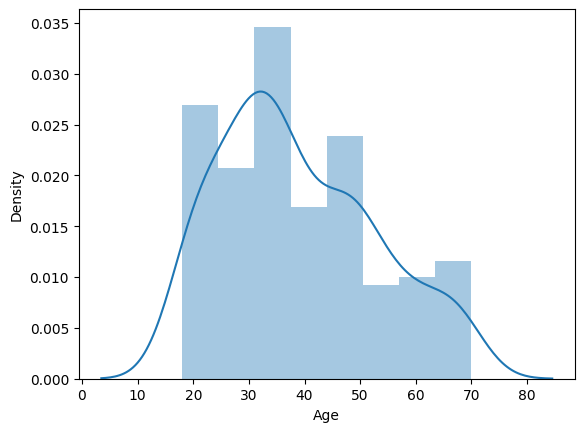

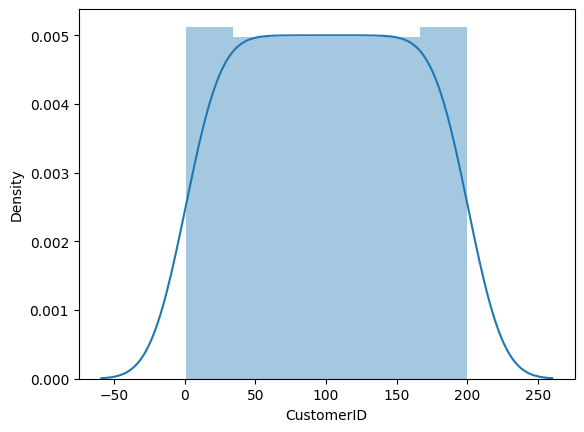

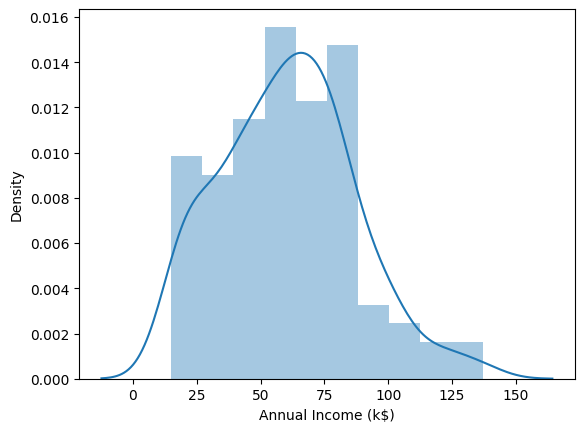

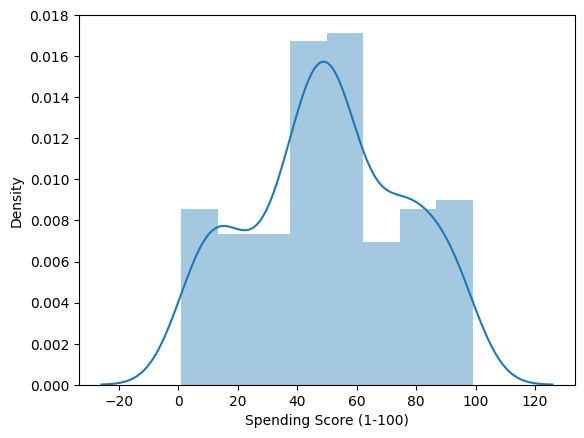

In [ ]:
for i in columns:
  plt.figure()
  sns.distplot(df[i])

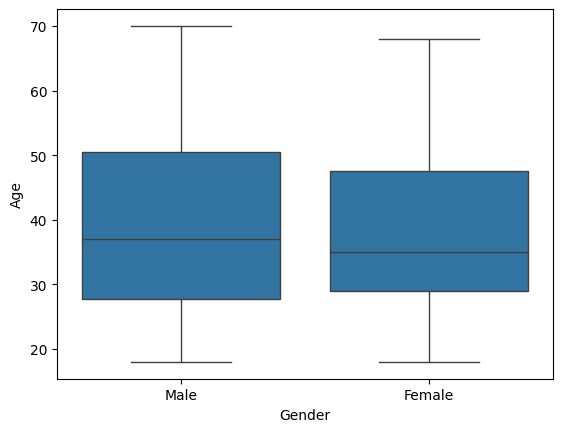

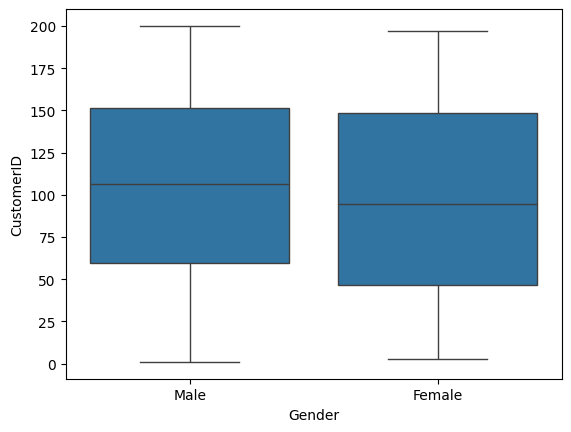

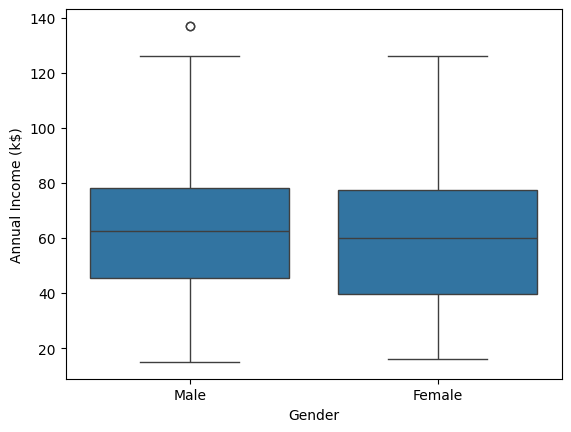

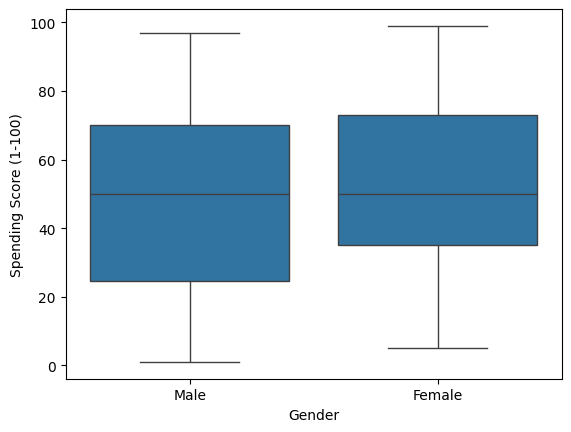

In [ ]:
for i in columns:
  plt.figure()
  sns.boxplot(data=df,x='Gender',y=df[i])

<Axes: >

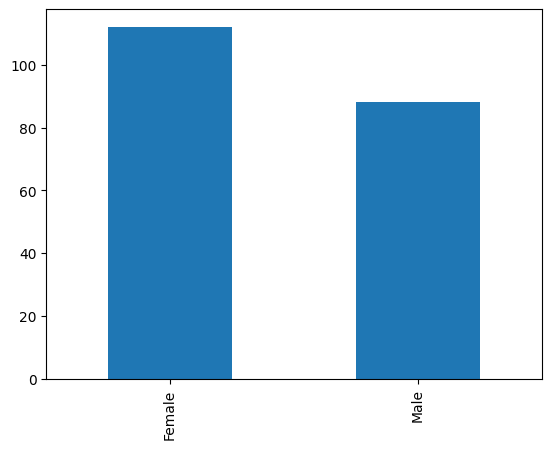

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

**BiVariate Analysis**

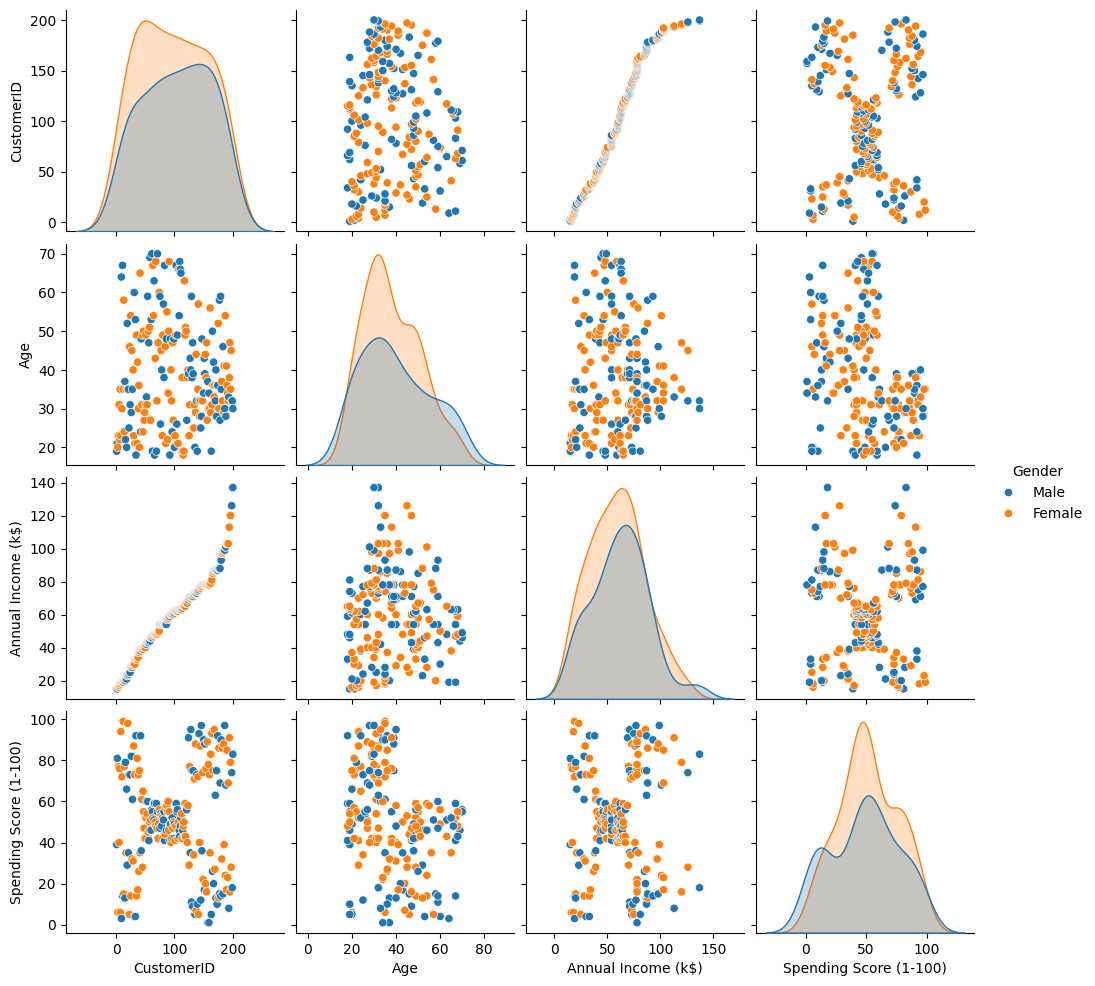

In [ ]:
sns.pairplot(data=df,hue='Gender')

In [ ]:
df.groupby(['Gender'])['Age','Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

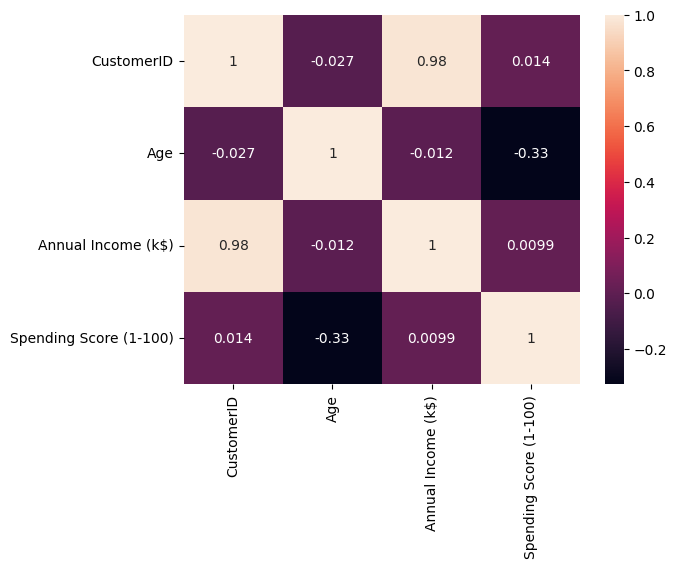

In [ ]:
sns.heatmap(df.corr(),annot=True)

Through this EDA , we get to know that Annual Incone and Spending Score are the most importanmt features , so we will  furthere explore them.

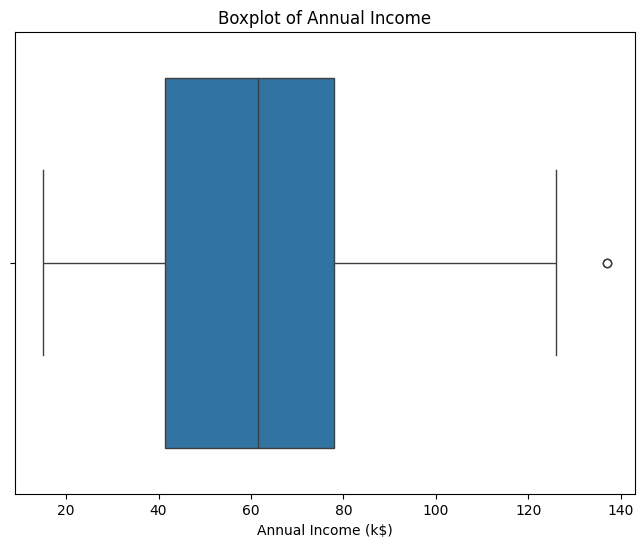

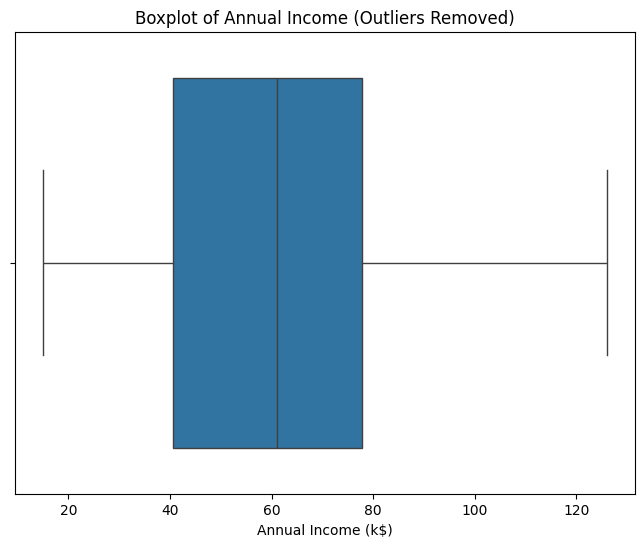

Number of outliers removed: 2


In [ ]:
# Visualize the distribution of 'Annual Income'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')
plt.show()

# Calculate IQR (Interquartile Range)
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = df[(df['Annual Income (k$)'] < lower_bound) | (df['Annual Income (k$)'] > upper_bound)]
df_no_outliers = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]

# Visualize the distribution after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Annual Income (k$)'])
plt.title('Boxplot of Annual Income (Outliers Removed)')
plt.show()

# Display the number of removed outliers
print(f'Number of outliers removed: {len(outliers)}')

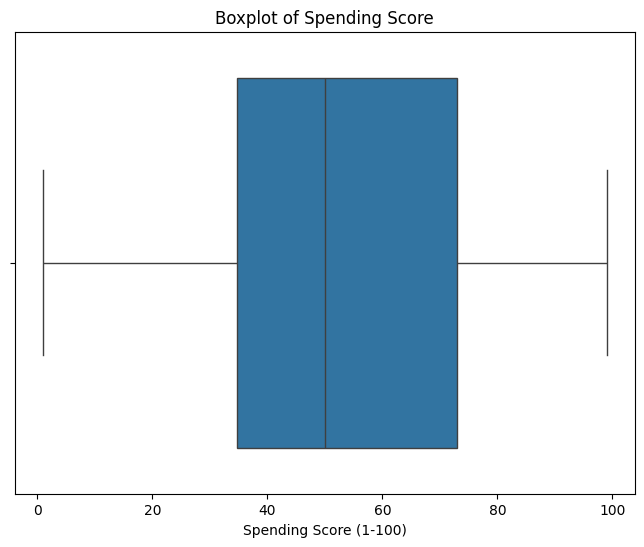

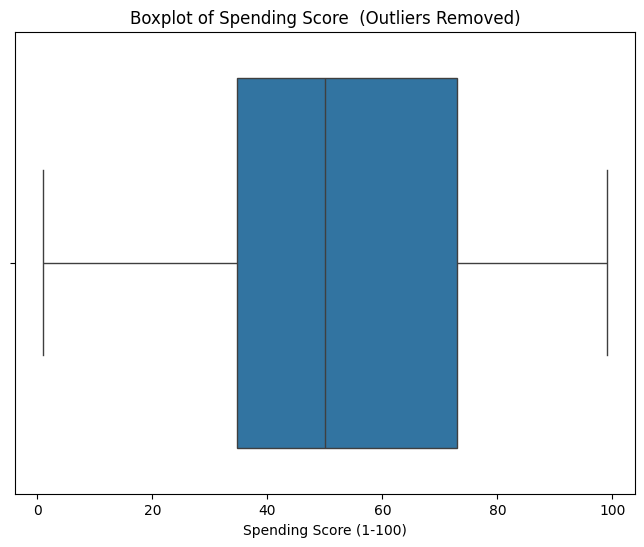

Number of outliers removed: 0


In [ ]:
# Visualize the distribution of 'Spending Score'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')
plt.show()

# Calculate IQR (Interquartile Range)
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = df[(df['Spending Score (1-100)'] < lower_bound) | (df['Spending Score (1-100)'] > upper_bound)]
df_no_outliers = df[(df['Spending Score (1-100)'] >= lower_bound) & (df['Spending Score (1-100)'] <= upper_bound)]

# Visualize the distribution after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score  (Outliers Removed)')
plt.show()

# Display the number of removed outliers
print(f'Number of outliers removed: {len(outliers)}')

**Model Building**

In [ ]:
X=df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

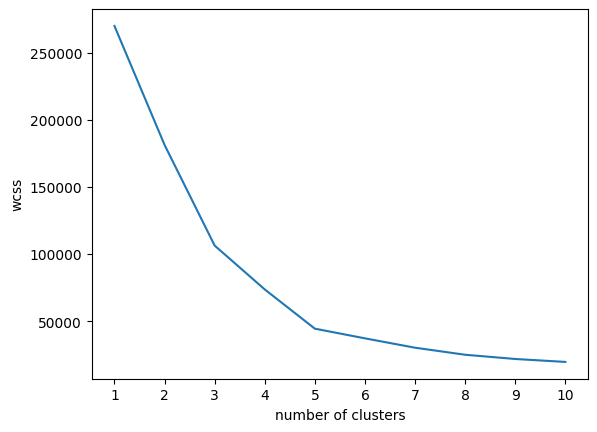

In [ ]:
#plotting elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

So, here we consider k=5 , by elbow method.

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
Y=kmeans.predict(X)
print(Y)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


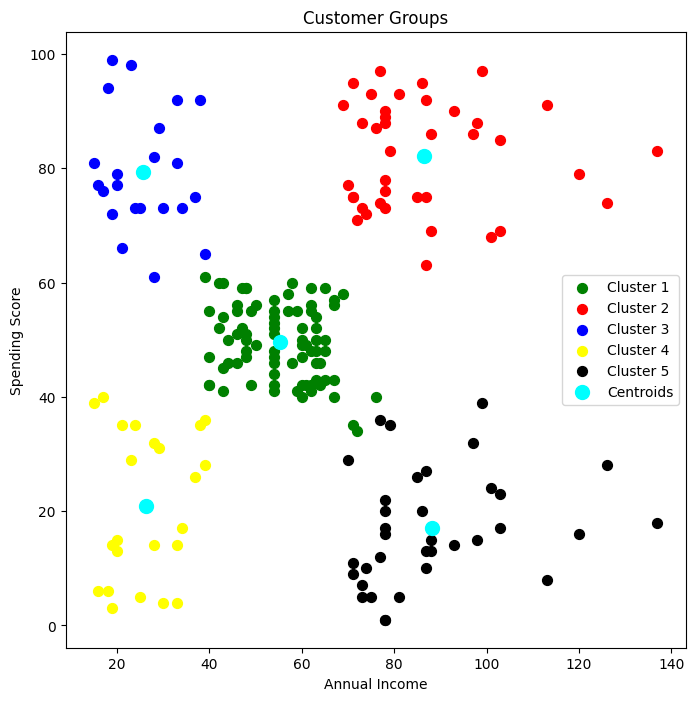

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already performed KMeans clustering and have the cluster labels in 'Y'

# Converting DataFrame columns to NumPy arrays
X_np = X.values

# Creating a scatter plot to visualize the clusters
plt.figure(figsize=(8, 8))

# Scatter plots for each cluster
plt.scatter(X_np[Y == 0, 0], X_np[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X_np[Y == 1, 0], X_np[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X_np[Y == 2, 0], X_np[Y == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(X_np[Y == 3, 0], X_np[Y == 3, 1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X_np[Y == 4, 0], X_np[Y == 4, 1], s=50, c='black', label='Cluster 5')

# Scatter plot for centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

# Adding labels and title
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()


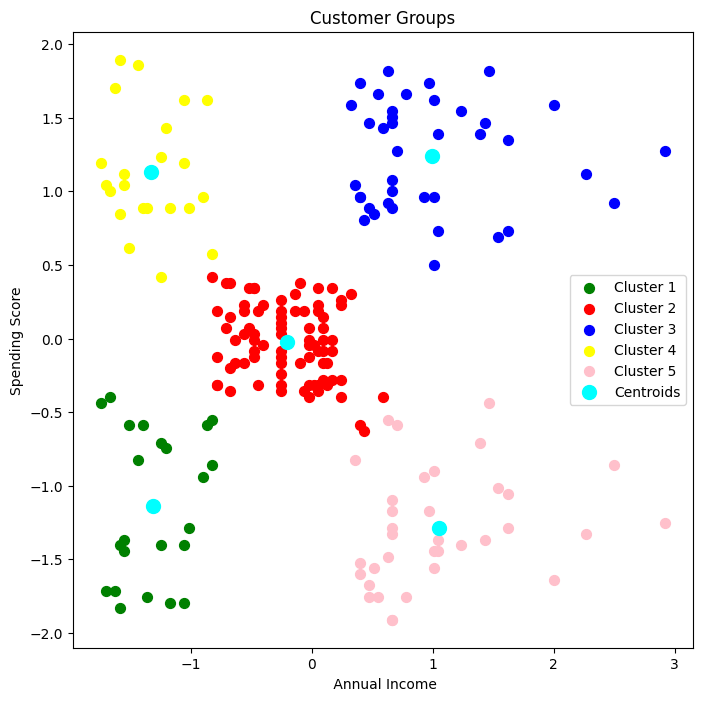

In [ ]:

from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'df' and you are selecting two columns 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initializing KMeans with 5 clusters and 'k-means++' initialization method
kmeans = KMeans(n_clusters=5, init='k-means++')

# Fitting the model on the scaled features
kmeans.fit(X_scaled)

# Predicting the cluster labels for each data point
Y = kmeans.predict(X_scaled)

# Creating a scatter plot to visualize the clusters
plt.figure(figsize=(8, 8))

# Scatter plots for each cluster
plt.scatter(X_scaled[Y == 0, 0], X_scaled[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X_scaled[Y == 1, 0], X_scaled[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X_scaled[Y == 2, 0], X_scaled[Y == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(X_scaled[Y == 3, 0], X_scaled[Y == 3, 1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X_scaled[Y == 4, 0], X_scaled[Y == 4, 1], s=50, c='pink', label='Cluster 5')

# Scatter plot for centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

# Adding labels and title
plt.title('Customer Groups')
plt.xlabel(' Annual Income')
plt.ylabel('Spending Score')

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming you have a DataFrame named 'df' with columns 'Annual Income (k$)', 'Spending Score (1-100)', and 'Gender'
X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

# Encoding gender to numeric values (if needed)
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

# Scaling the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Annual Income (k$)', 'Spending Score (1-100)']])

# Initializing KMeans with 5 clusters and 'k-means++' initialization method
kmeans = KMeans(n_clusters=5, init='k-means++')

# Fitting the model on the scaled features
kmeans.fit(X_scaled)

# Predicting the cluster labels for each data point
X['Cluster'] = kmeans.predict(X_scaled)

# Counting the number of men and women in each cluster
cluster_gender_count = X.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)

# Displaying the count of men and women in each cluster
print("Number of Men and Women in Each Cluster:")
print(cluster_gender_count)




Number of Men and Women in Each Cluster:
Gender    0   1
Cluster        
0         9  13
1        33  48
2        18  21
3         9  14
4        19  16


**Analysis**




1.   Target group would be cluster 3 (blue color) which has high spending score and high income.
2.   Majority of customers are women so should look for the ways to attract these customers using a marketing campaign targeting popular items in this cluster.
3.  Cluster 5 presents an interesting opportunity to market to the customers for sales event on popular items.

